In [7]:
# made by Gibeom LEE, HI LAB
# 한 폴더 내 모든 csv 파일의 TENG Vpp값을 구할 때 유용합니다.

In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

250619 fep10_Vpp: 218.83 V


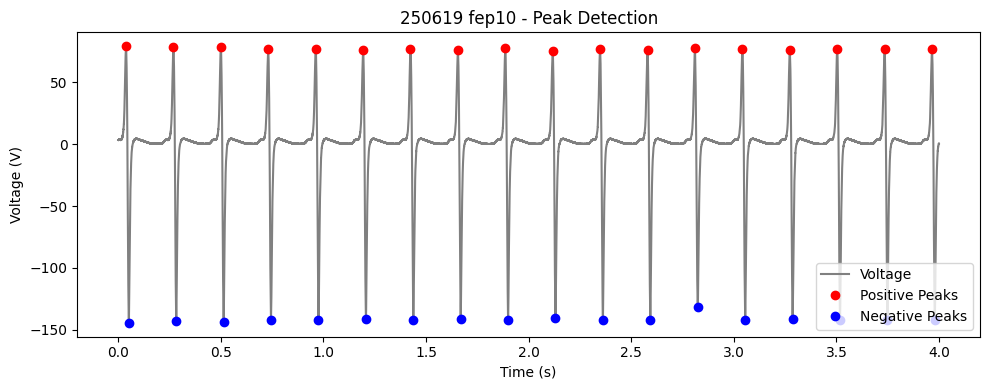

250619 fep6_Vpp: 162.84 V


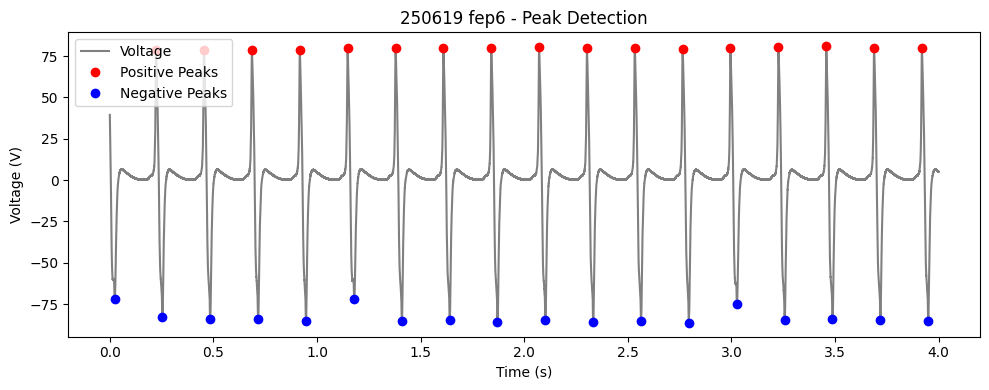

250619 fep7_Vpp: 140.44 V


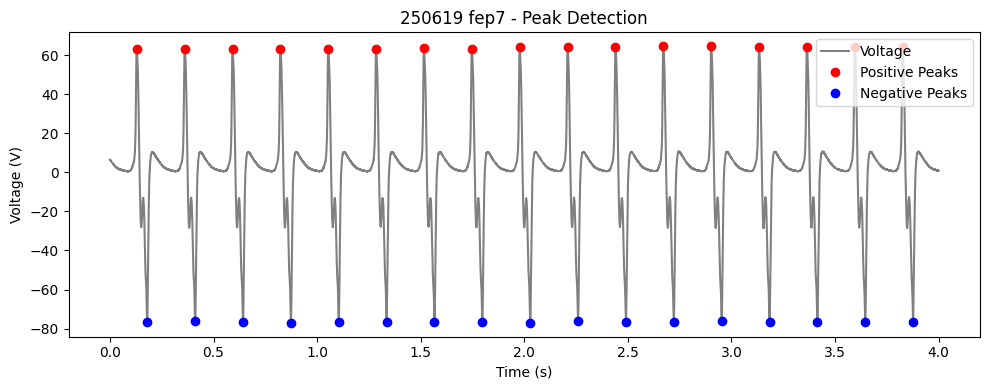

250619 fep8_Vpp: 160.50 V


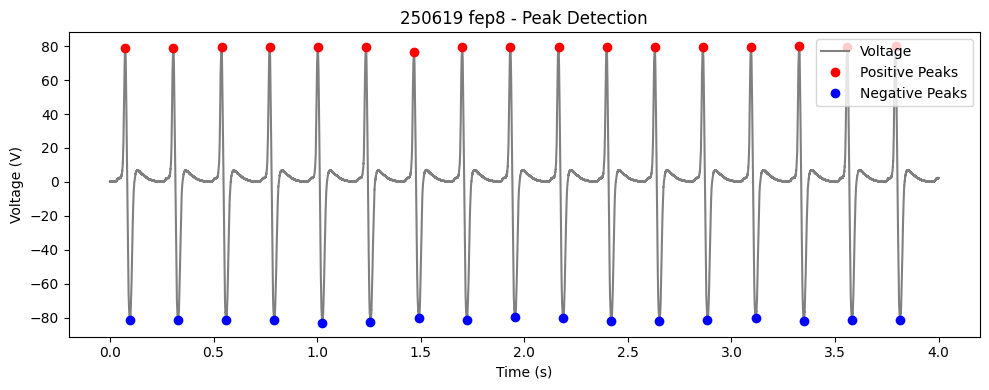

250619 fep9_Vpp: 221.01 V


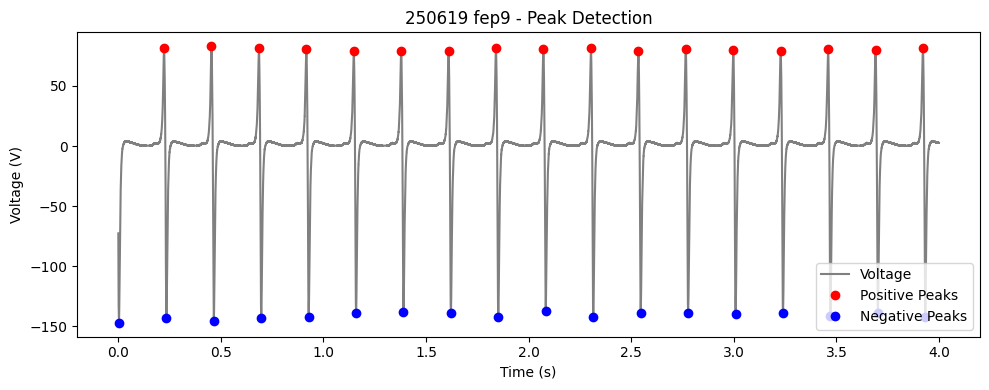


📊 모든 파일의 평균 Vpp 값 목록
250619 fep10.csv: 218.83 V
250619 fep6.csv: 162.84 V
250619 fep7.csv: 140.44 V
250619 fep8.csv: 160.50 V
250619 fep9.csv: 221.01 V

📈 전체 평균 Vpp: 180.73 V
📉 표준편차 (에러바): 36.83 V


In [ ]:
# 폴더 경로 지정
folder_path = r"C:\Users\GCU\OneDrive - gachon.ac.kr\HI Lab\0. Projects\0. On going\1. ionic DC-TENG\0. 실험자료\5. Final stage\250619_소재별 Charge pump\fep\2차 fep"

# find peak height 설정
height = 0.2
relative_threshold_ratio = 0.5  # 최대 피크 대비 필터링 비율 (50%)

# 폴더 내 모든 CSV 파일 탐색
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 전체 Vpp 저장 리스트
all_vpp_values = []

# 각 파일별 평균 Vpp 계산 및 그래프 그리기
for file_name in csv_files:
    file_path = os.path.join(folder_path, file_name)
    try:
        data = pd.read_csv(file_path)

        # 시간과 전압 데이터 추출
        time = data.iloc[:, 0].values
        voltage = data.iloc[:, 1].values

        # + / - 피크 탐지
        pos_peaks, _ = find_peaks(voltage, height=height, distance=1000)
        neg_peaks, _ = find_peaks(-voltage, height=height, distance=1000)

        # 최대 피크 기준값 계산
        all_peaks_combined = np.concatenate((pos_peaks, neg_peaks))
        if len(all_peaks_combined) == 0:
            print(f"{file_name}: 유효한 피크 없음")
            continue

        max_peak_value = np.max(np.abs(voltage[all_peaks_combined]))
        threshold = max_peak_value * relative_threshold_ratio

        # 상대 임계값 기준 피크 필터링
        pos_peaks_filtered = [p for p in pos_peaks if abs(voltage[p]) >= threshold]
        neg_peaks_filtered = [p for p in neg_peaks if abs(voltage[p]) >= threshold]

        # 모든 피크 통합 후 정렬
        all_peaks = np.sort(np.concatenate((pos_peaks_filtered, neg_peaks_filtered)))

        # Vpp 계산
        vpp_list = []
        for i in range(len(all_peaks) - 1):
            start = all_peaks[i]
            end = all_peaks[i + 1]
            if end > start:
                vpp = np.max(voltage[start:end+1]) - np.min(voltage[start:end+1])
                vpp_list.append(vpp)

        mean_vpp = np.mean(vpp_list) if vpp_list else 0
        base_name = os.path.splitext(file_name)[0]
        print(f"{base_name}_Vpp: {mean_vpp:.2f} V")

        # 전체 리스트 저장
        all_vpp_values.append(mean_vpp)

        # 피크 그래프 그리기
        plt.figure(figsize=(10, 4))
        plt.plot(time, voltage, label='Voltage', color='gray')
        plt.plot(time[pos_peaks_filtered], voltage[pos_peaks_filtered], 'ro', label='Positive Peaks')
        plt.plot(time[neg_peaks_filtered], voltage[neg_peaks_filtered], 'bo', label='Negative Peaks')
        plt.title(f"{base_name} - Peak Detection")
        plt.xlabel("Time (s)")
        plt.ylabel("Voltage (V)")
        plt.legend()
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"{file_name} 처리 중 오류 발생: {e}")

# 모든 Vpp 결과 출력
print("\n==============================")
print("📊 모든 파일의 평균 Vpp 값 목록")
for i, vpp in enumerate(all_vpp_values):
    print(f"{csv_files[i]}: {vpp:.2f} V")

# 전체 평균 및 표준편차 계산
if all_vpp_values:
    overall_mean = np.mean(all_vpp_values)
    overall_std = np.std(all_vpp_values, ddof=1)  # sample standard deviation
    print("\n==============================")
    print(f"📈 전체 평균 Vpp: {overall_mean:.2f} V")
    print(f"📉 표준편차 (에러바): {overall_std:.2f} V")
else:
    print("📭 Vpp 데이터를 계산할 수 없습니다.")